In [3]:
from fomos.io import FormindData
from fomos.data import MLData
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
import numpy as np
import h5py

In [4]:
def plot_pr(X, Y):
    X = np.squeeze(X)
    Y = np.squeeze(Y)

    clf = LogisticRegression(max_iter=50000, class_weight="balanced").fit(X, Y)
    PrecisionRecallDisplay.from_estimator(clf, X, Y)

(95984, 657)
(95984, 505)
(95984,)
(95984, 1162)


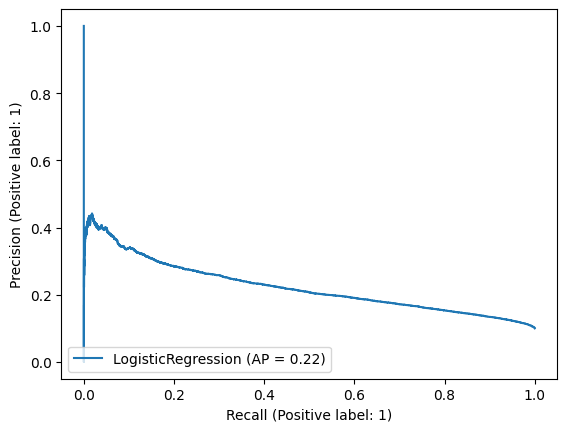

In [10]:
agg = "pentad"
directory = "/data/compoundx/anand/benchmark-dataset/" 
filename = directory + f"train_MBR_beech_{agg}_10000ha.h5"

with h5py.File(filename, "r") as f:
    Y = f["Y"][:]
    Xd = f["Xd"][:]
    Xs = f["Xs"][:]


# shift = 0
# Xd = Xd [:-shift]
# Xs = Xs[shift:]
# Y = Y[:-shift]

Y = np.where(Y>np.percentile(Y, 90), 1, 0)
Xd = Xd.reshape(Xd.shape[0], -1)
Xs = Xs[:,:,:]
Xs = Xs.reshape(Xs.shape[0], -1)

Xd = (Xd - Xd.mean(0))/Xd.std(0)

print(Xd.shape)
print(Xs.shape)
print(Y.shape)
X  = np.hstack([Xd, Xs])
print(X.shape)
plot_pr(X, Y)

ValueError: Invalid dataset identifier (invalid dataset identifier)

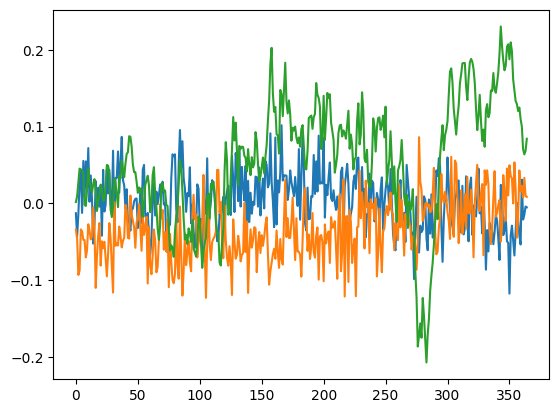

In [57]:
def norm(X):
    return (X-X.mean(0))/X.std(0)

Xd_norm = norm(Xd)


for i in range(3):
    plt.plot(Xd_norm[index, :, i].mean(0))

plt.show()

<KeysViewHDF5 ['GPP', 'LAI', 'MBR', 'MNR', 'NEE', 'TotB', 'age_bin', 'age_dist', 'd_bin', 'd_dist', 'h_bin', 'h_dist', 'irr', 'laitree_bin', 'laitree_dist', 'rain', 'sv_bin', 'sv_dist', 'temp']>


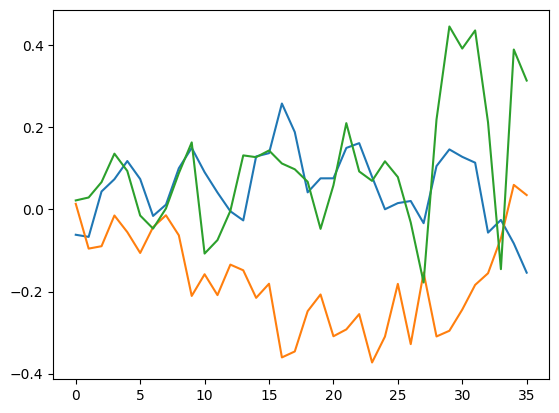

In [106]:
filename = "/data/compoundx/anand/forest-mortality/formind_sim/1ha_sim/beech/beech_dynMort_1_10000ha.h5"
Xd = np.zeros((8000, 365, 3))
with h5py.File(filename, "r") as f:
    Xd[:,:, 0] = f["irr"][2000:]
    Xd[:,:, 1] = f["rain"][2000:] 
    Xd[:,:, 2] = f["temp"][2000:] 
    print(f.keys())
    Xs = f["laitree_dist"][2000:][:,:, np.newaxis]
    Y = f["MBR"][2000:]

Xs = Xs[1:]
Xd = Xd[:-1]
Y = Y[1:]

data = MLData(Xd ,Xs, Y)
Xd, Xs, Y = data.get_monthly_XY(classify=True)

Xd_norm = norm(Xd)
index = Y>np.percentile(Y,90)

for i in range(3):
    plt.plot(Xd_norm[index, :, i,0].mean(0))

/tmp/ipykernel_265892/3029295731.py:2: RuntimeWarning: invalid value encountered in divide
  return (X-X.mean(0))/X.std(0)


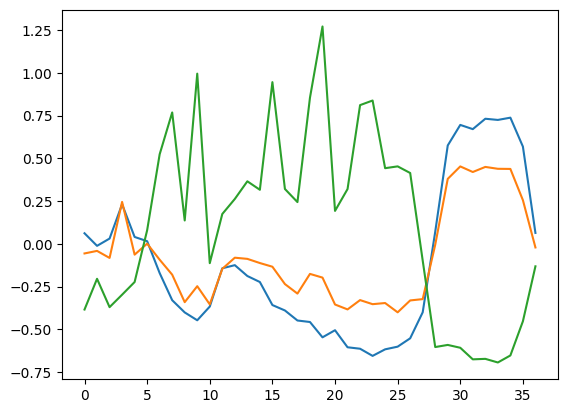

In [126]:
Xs_norm = norm(Xs)
for i in range(1,4):
    n=i
    plt.plot(Xs_norm[n:][index[:-n], :, 0].mean(0))